In [0]:
import cv2
import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import os, json, itertools

In [2]:
from google.colab import files, drive
drive.mount('/content/drive')
filepath = u'/content/drive/My Drive/IA/Projeto/sample_data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
metadata = json.load(open(filepath+'metadata_db.json', 'r'))

In [0]:
arq_imagens = [png for png in os.listdir(filepath) if png.endswith(".png")]
ext_imagens = [nn.replace(".png", "") for nn in arq_imagens]
imagens_originais = []
imagens_grayscale = []

for i in range(len(arq_imagens)):
  aimg = arq_imagens[i]
  img = cv2.imread(filepath + aimg)
  imagens_originais.append(img)
  imagens_grayscale.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))


In [0]:
plt.figure(figsize=(30,12))
plt.imshow(imagens_grayscale[0], cmap="gray")
plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

### Filtering
(TCC)

<BarContainer object of 64 artists>

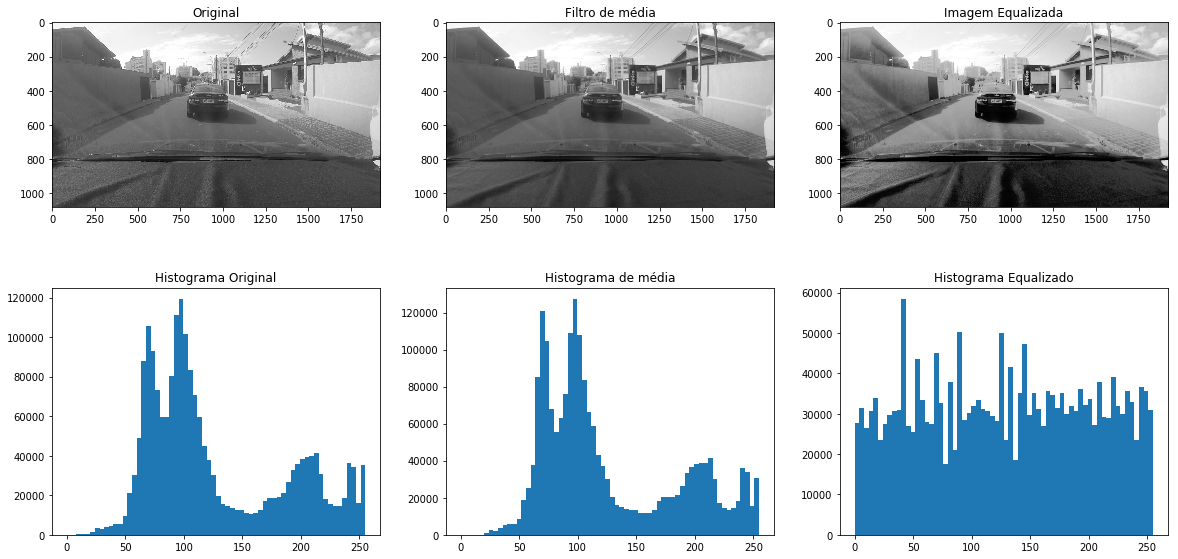

In [0]:
teste = imagens_grayscale[1]

plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.title("Original")
plt.imshow(teste, cmap="gray")

nbins = 64
h, bin_edges = np.histogram(teste.ravel(), nbins, (0, 255))
w = 256./nbins

bin_centers = bin_edges[1:] - (w/2)
plt.subplot(2,3,4)
plt.title("Histograma Original")
plt.bar(bin_centers, h, width=w)

###################################################################

plt.subplot(2,3,2)
teste_media = cv2.blur(teste, (5,5))
plt.title("Filtro de média")
plt.imshow(teste_media, cmap="gray")

nbins = 64
h, bin_edges = np.histogram(teste_media.ravel(), nbins, (0, 255))
w = 256 / nbins

bin_centers = bin_edges[1:] - (w/2)
plt.subplot(2,3,5)
plt.title("Histograma de média")
plt.bar(bin_centers, h, width=w)

###################################################################

plt.subplot(2,3,3)
teste_eql = cv2.equalizeHist(teste_media, (5,5))
plt.title("Imagem Equalizada")
plt.imshow(teste_eql, cmap="gray")

nbins = 64
h, bin_edges = np.histogram(teste_eql.ravel(), nbins, (0, 255))
w = 256 / nbins

bin_centers = bin_edges[1:] - (w/2)
plt.subplot(2,3,6)
plt.title("Histograma Equalizado")
plt.bar(bin_centers, h, width=w)

Testando outros blurs

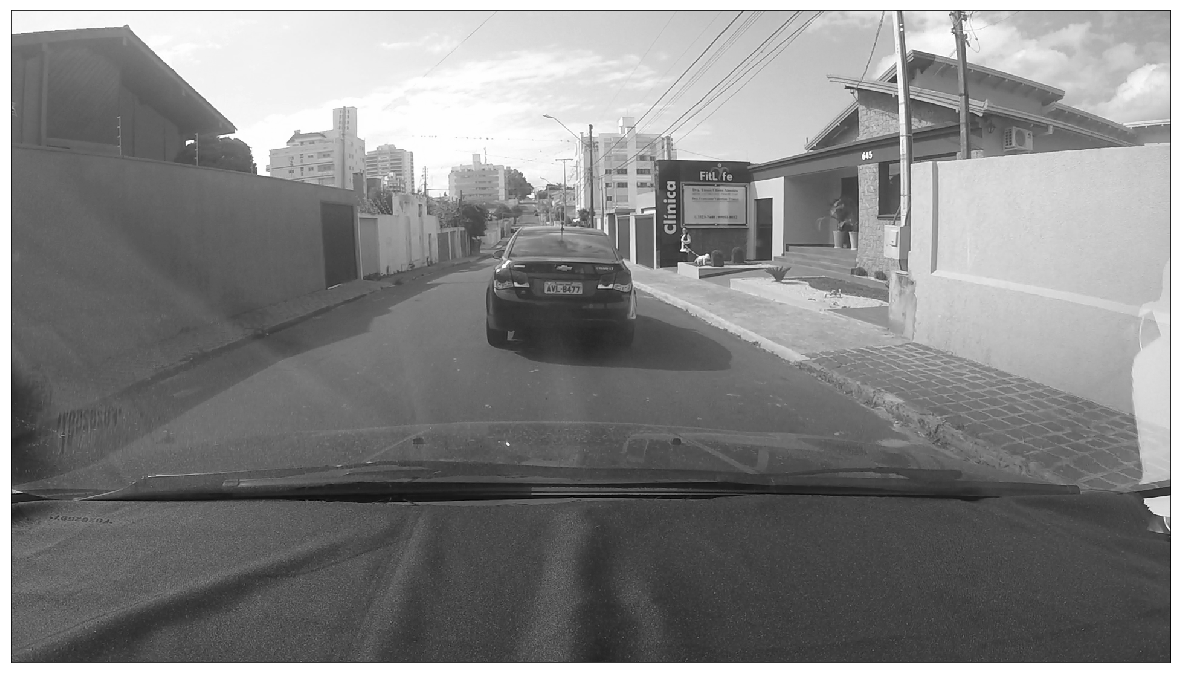

In [0]:
plt.figure(figsize=(30,12))
plt.imshow(teste, cmap="gray")
plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

Embaçando imagens?

laplaciano

In [0]:
laplacian = cv2.Laplacian(teste_eql, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

prewitt

In [0]:
kernelx = np.array([[1,1,1], [0,0,0], [-1, -1, -1]])
kernely = np.array([[-1,0,1], [-1,0,1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(teste_eql, -1, kernelx)
img_prewitty = cv2.filter2D(teste_eql, -1, kernely)

sobel

In [0]:
sobelx = cv2.Sobel(teste_eql, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(teste_eql, cv2.CV_64F, 0, 1, ksize=3)
t1, t2 = np.uint8(np.absolute(sobelx)), np.uint8(np.absolute(sobely))
true_sobel = cv2.bitwise_or(t1, t2)
sobel_mag = (sobelx**2 + sobely**2) ** 0.5
sobel_ang = np.rad2deg(np.angle(sobelx+sobely*1j))
sobel_ang = (sobel_ang >= 0) * sobel_ang + (sobel_ang < 0) * (sobel_ang + 180)
sobel_ang = (sobel_ang < 180) * sobel_ang

In [0]:
sobelxn = cv2.normalize(sobelx, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
sobelyn = cv2.normalize(sobely, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
sobel_magn = cv2.normalize(sobel_mag, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
sobel_angn = cv2.normalize(sobel_ang, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

canny e gradiente morfologico

In [0]:
canny = cv2.Canny(teste_eql, 100, 300)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
morphg = cv2.morphologyEx(teste_eql, cv2.MORPH_GRADIENT, kernel)

plots

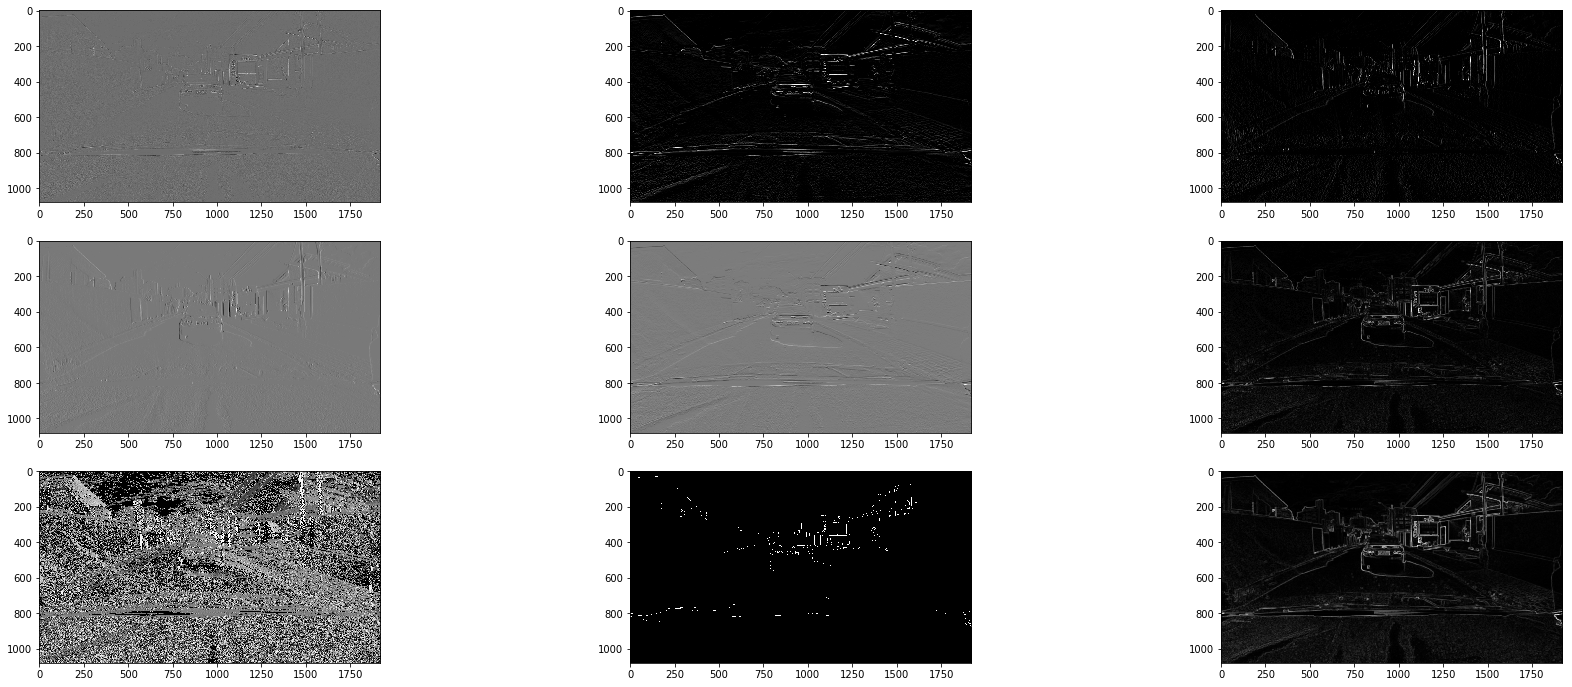

In [0]:
plt.figure(figsize=(30, 12))

plt.subplot(3,3,1)
plt.imshow(laplacian, cmap="gray")

plt.subplot(3,3,2)
plt.imshow(img_prewittx, cmap="gray")

plt.subplot(3,3,3)
plt.imshow(img_prewitty, cmap="gray")

plt.subplot(3,3,4)
plt.imshow(sobelxn, cmap="gray")

plt.subplot(3,3,5)
plt.imshow(sobelyn, cmap="gray")

plt.subplot(3,3,6)
plt.imshow(sobel_magn, cmap="gray")

plt.subplot(3,3,7)
plt.imshow(sobel_angn, cmap="gray")

plt.subplot(3,3,8)
plt.imshow(canny, cmap="gray")

plt.subplot(3,3,9)
plt.imshow(morphg, cmap="gray")

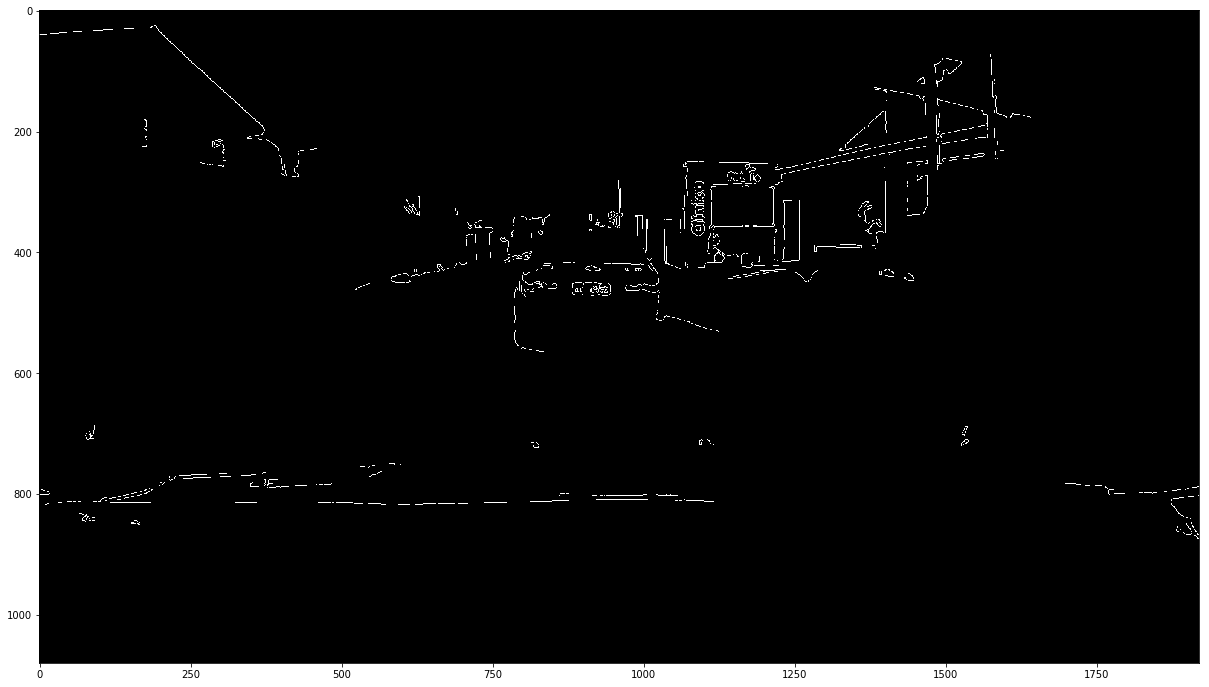

In [0]:
plt.figure(figsize=(30,12))
plt.imshow(canny, cmap="gray")

### Threshold

empirico

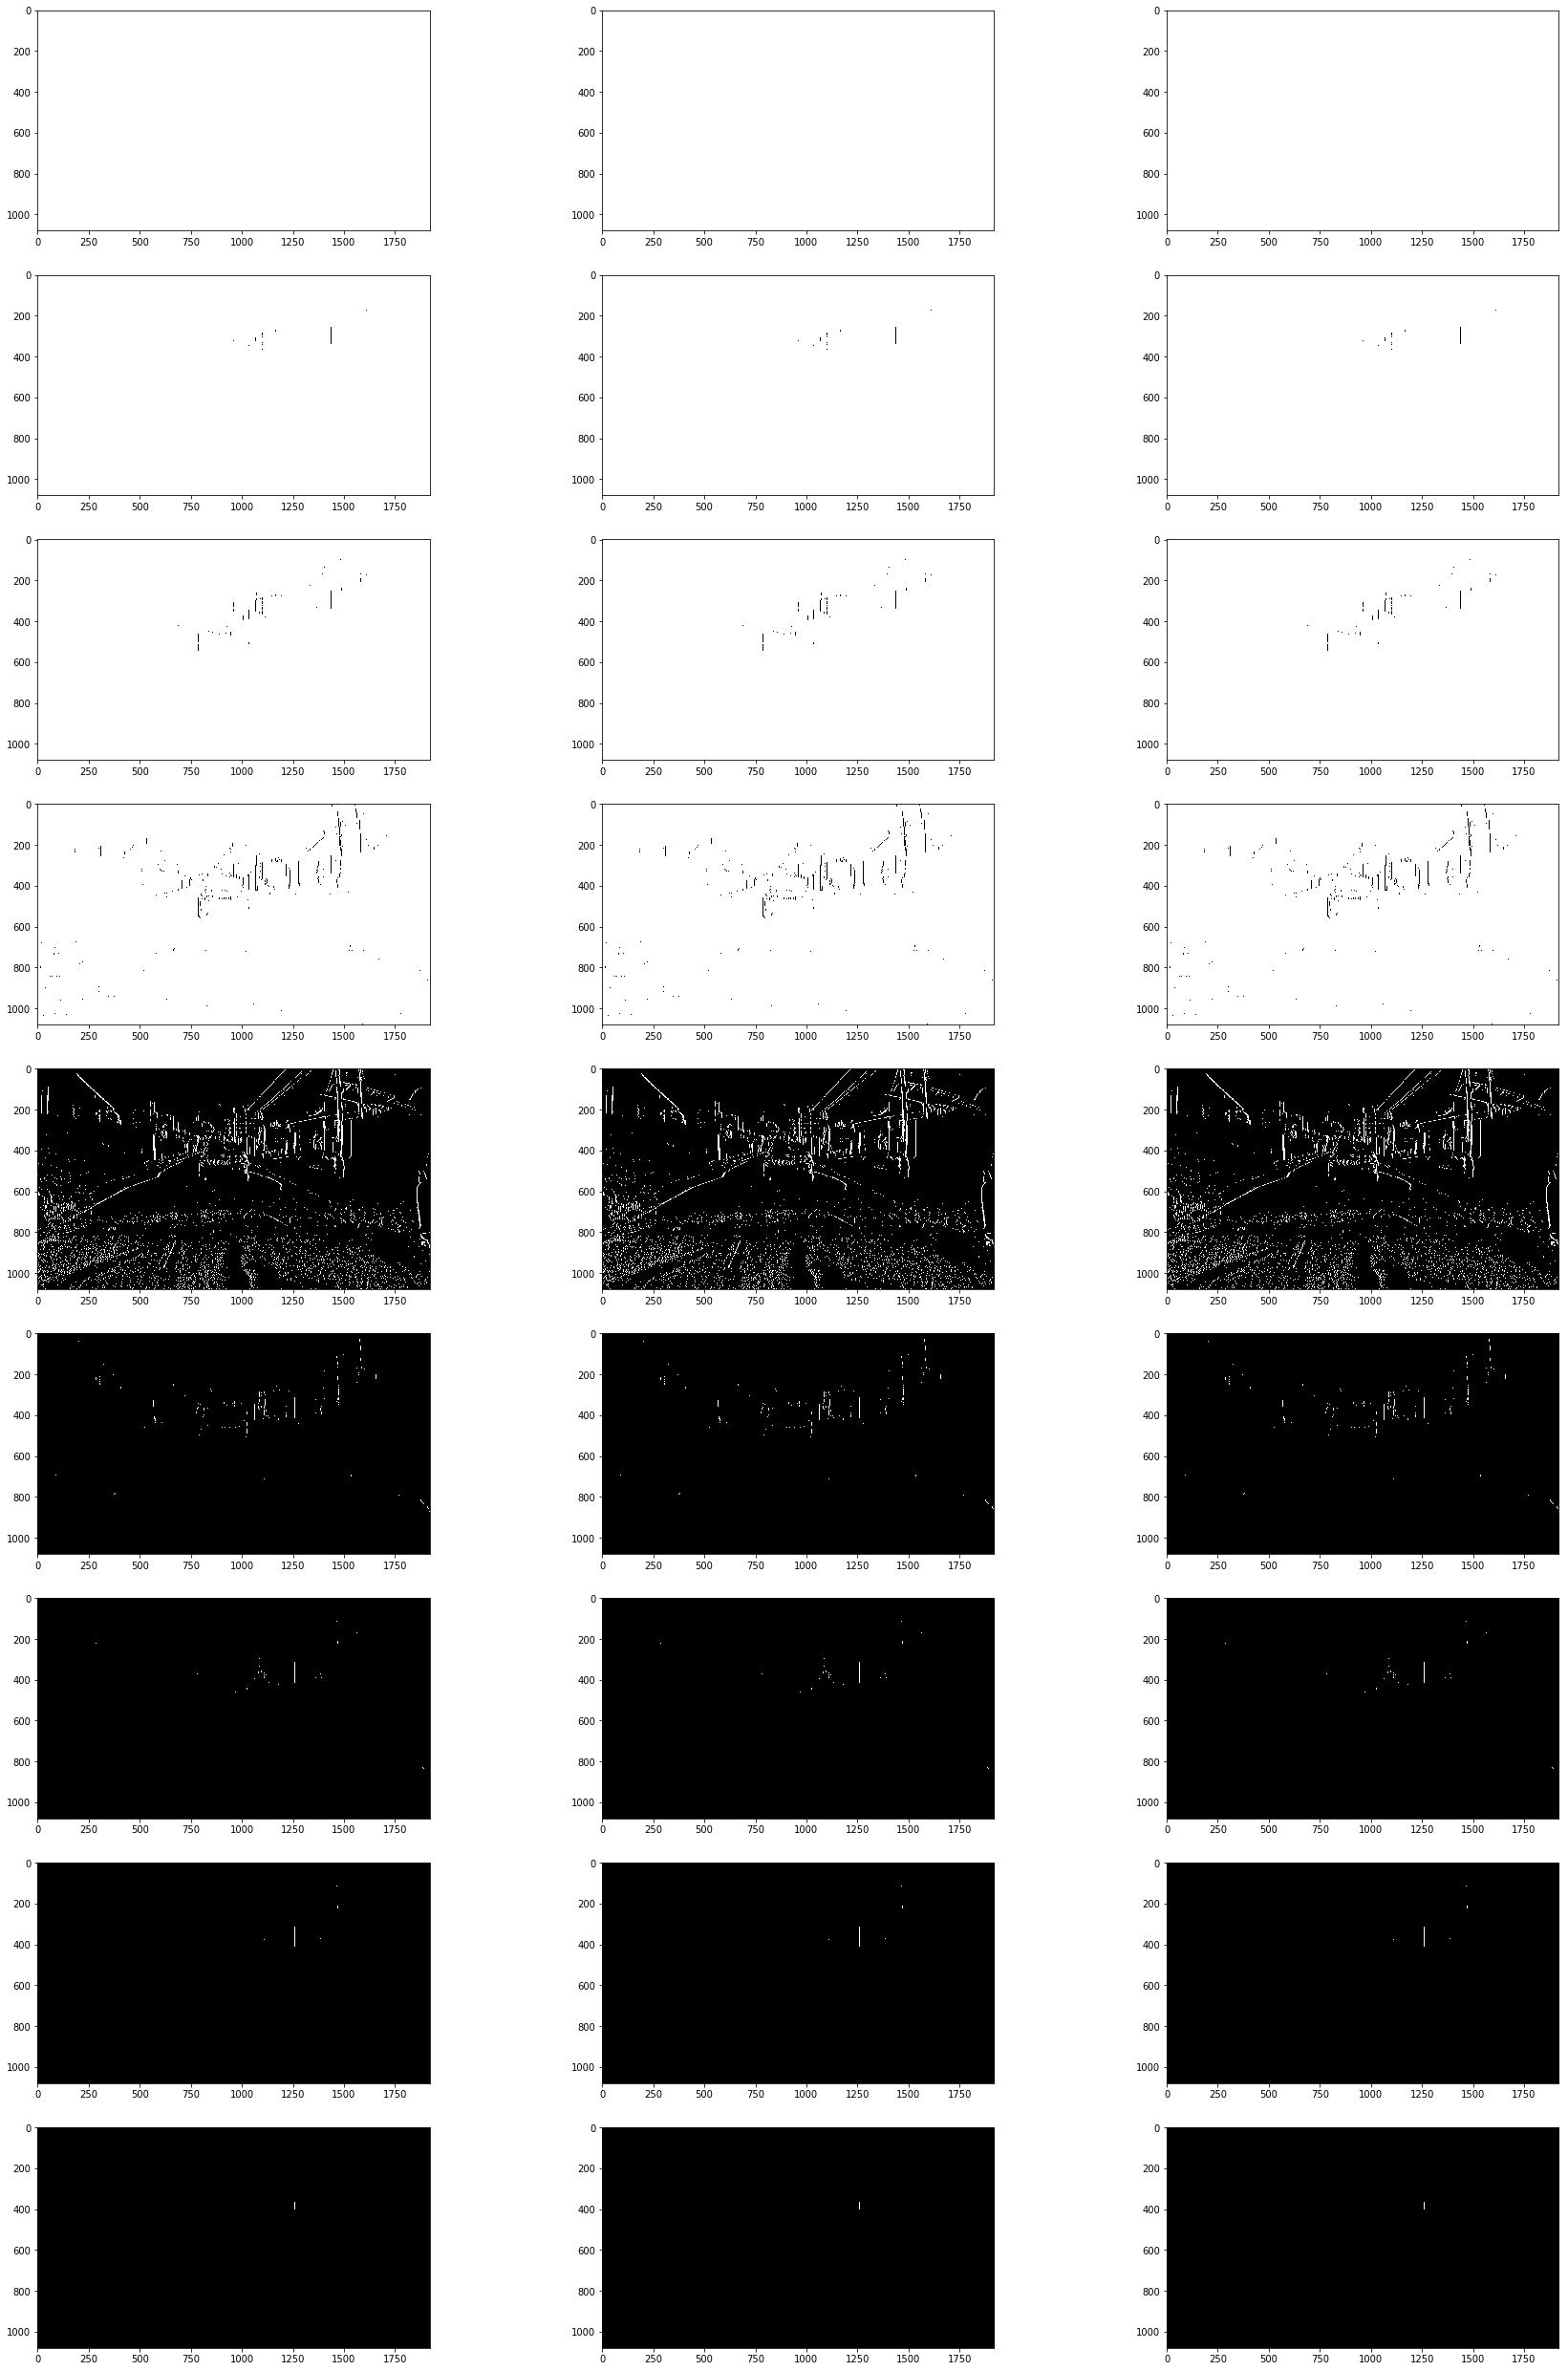

In [0]:
plt.figure(figsize=(30,45))

for i in range(9):
  limiar = int(255*(i+1)/10.0)
  plt.subplot(9, 3, i*3+1)
  _, xthr = cv2.threshold(sobelxn, limiar, 255, cv2.THRESH_BINARY)
  plt.imshow(xthr, cmap="gray")
  plt.subplot(9, 3, (i*3)+2)
  _, ythr = cv2.threshold(sobelxn, limiar, 255, cv2.THRESH_BINARY)
  plt.imshow(ythr, cmap="gray")
  plt.subplot(9, 3, (i*3)+3)
  _, mthr = cv2.threshold(sobelxn, limiar, 255, cv2.THRESH_BINARY)
  plt.imshow(mthr, cmap="gray")

global

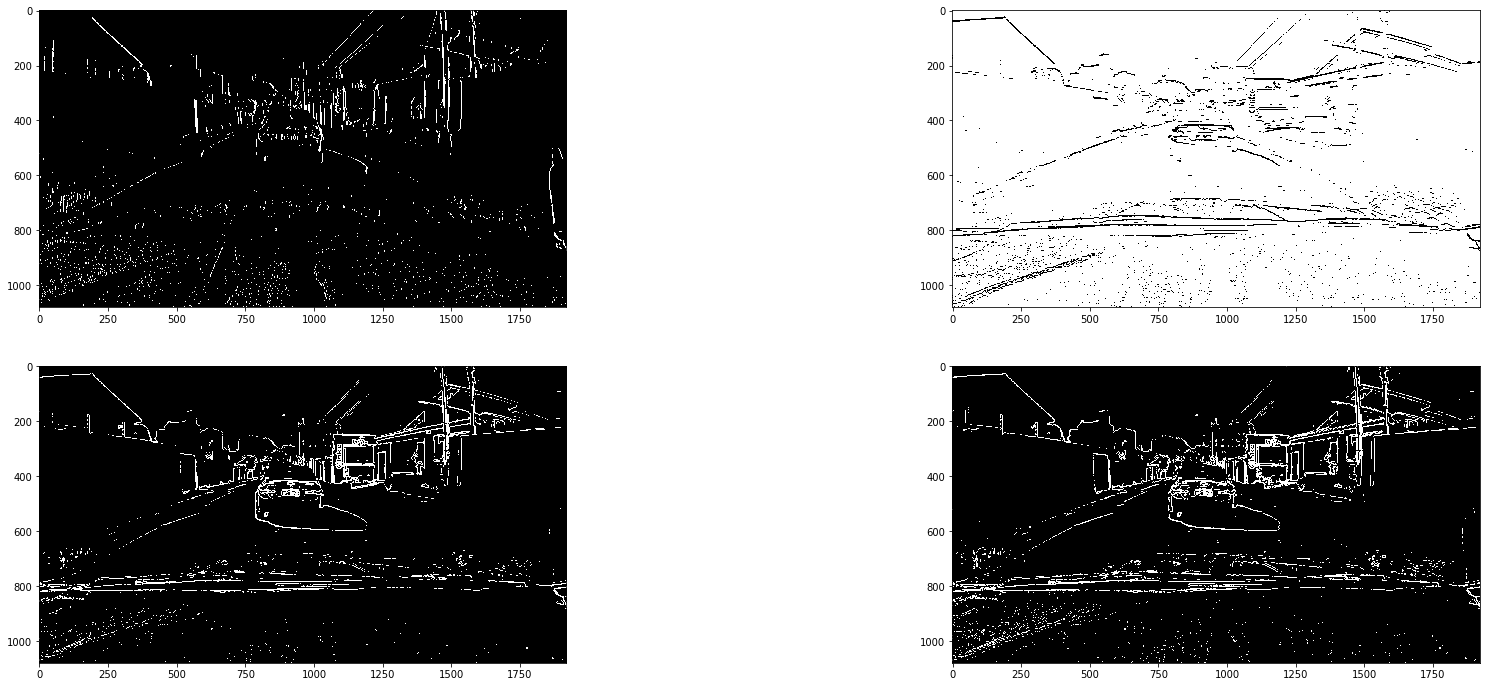

In [0]:
_, xthrg = cv2.threshold(sobelxn, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, ythrg = cv2.threshold(sobelyn, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mthrg = cv2.threshold(sobel_magn, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, true_thr = cv2.threshold(true_sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(30,12))
plt.subplot(2,2,1)
plt.imshow(xthrg, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(ythrg, cmap="gray")
plt.subplot(2,2,3)
plt.imshow(mthrg, cmap="gray")
plt.subplot(2,2,4)
plt.imshow(true_thr, cmap="gray")

otsu

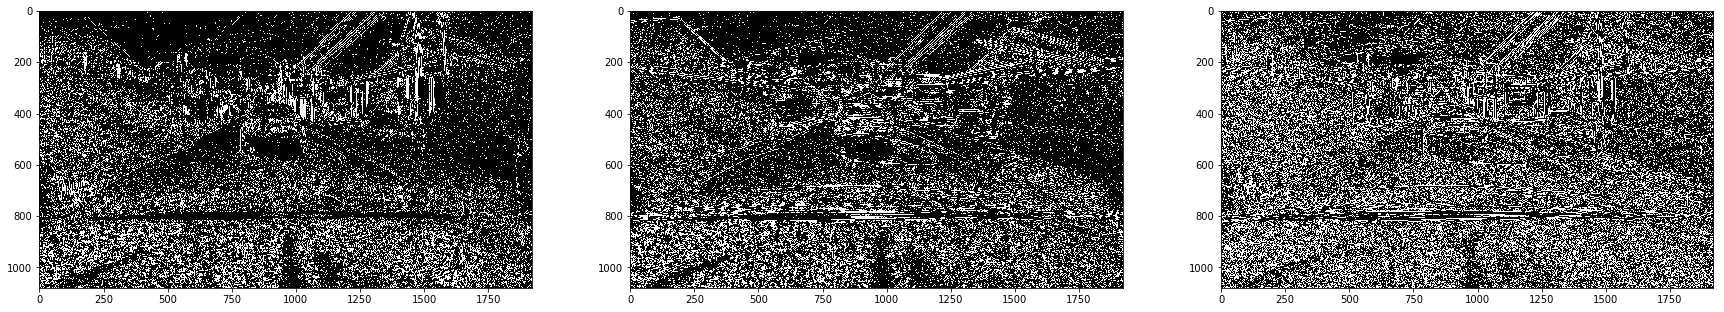

In [0]:
xthr = cv2.adaptiveThreshold(sobelxn, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
ythr = cv2.adaptiveThreshold(sobelyn, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
mthr = cv2.adaptiveThreshold(sobel_magn, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

plt.figure(figsize=(30,12))
plt.subplot(1,3,1)
plt.imshow(xthr, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(ythr, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(mthr, cmap="gray")

GAUSSIAN?

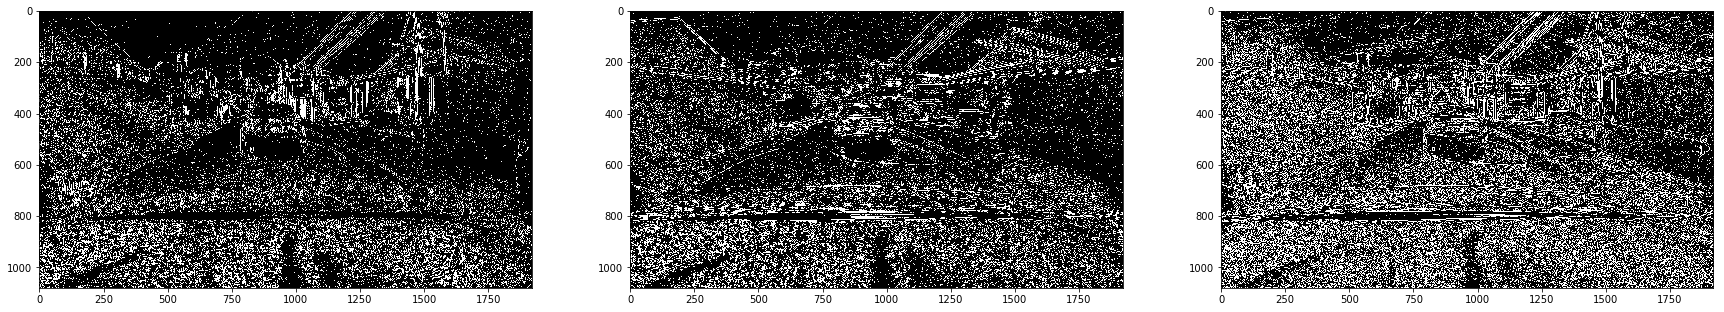

In [0]:
xthr = cv2.adaptiveThreshold(sobelxn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)
ythr = cv2.adaptiveThreshold(sobelyn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)
mthr = cv2.adaptiveThreshold(sobel_magn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)

plt.figure(figsize=(30,12))
plt.subplot(1,3,1)
plt.imshow(xthr, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(ythr, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(mthr, cmap="gray")

contornos

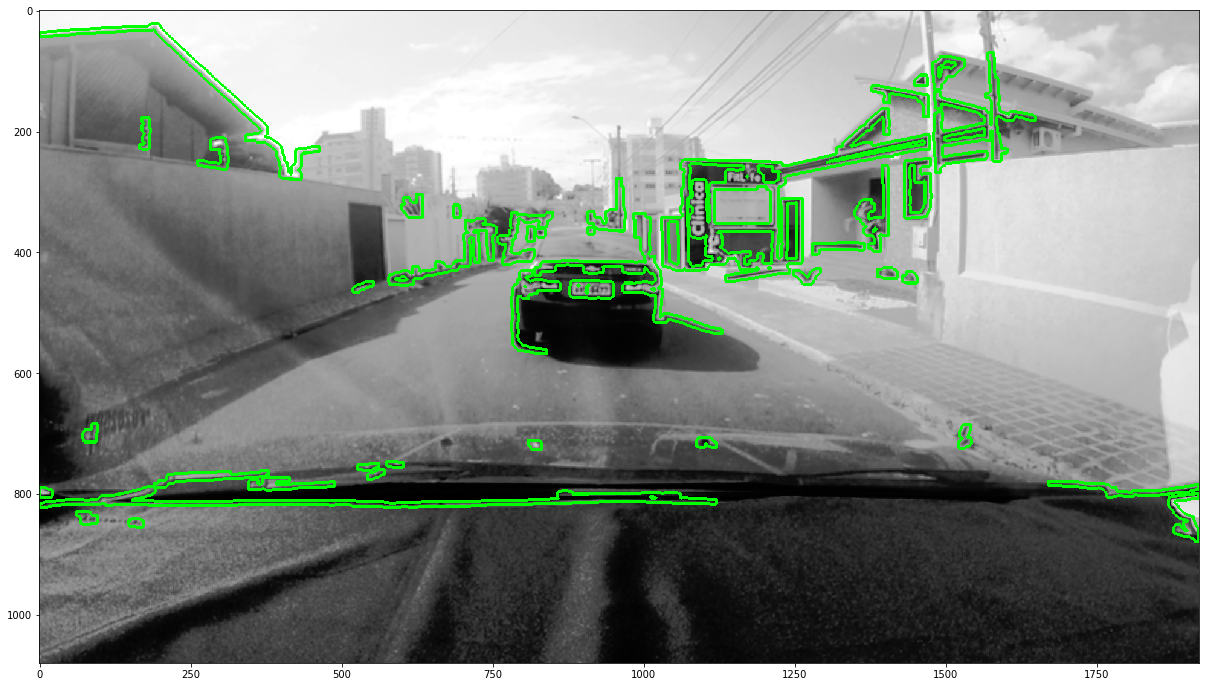

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,8))
morphDx = cv2.dilate(canny, kernel, 1)

_, contours1, hierarch = cv2.findContours(morphDx, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont1 = cv2.cvtColor(teste_eql, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont1, contours1, -1, (0, 255, 0), 3)
plt.figure(figsize=(30,12))
plt.imshow(img_cont1, cmap="gray")

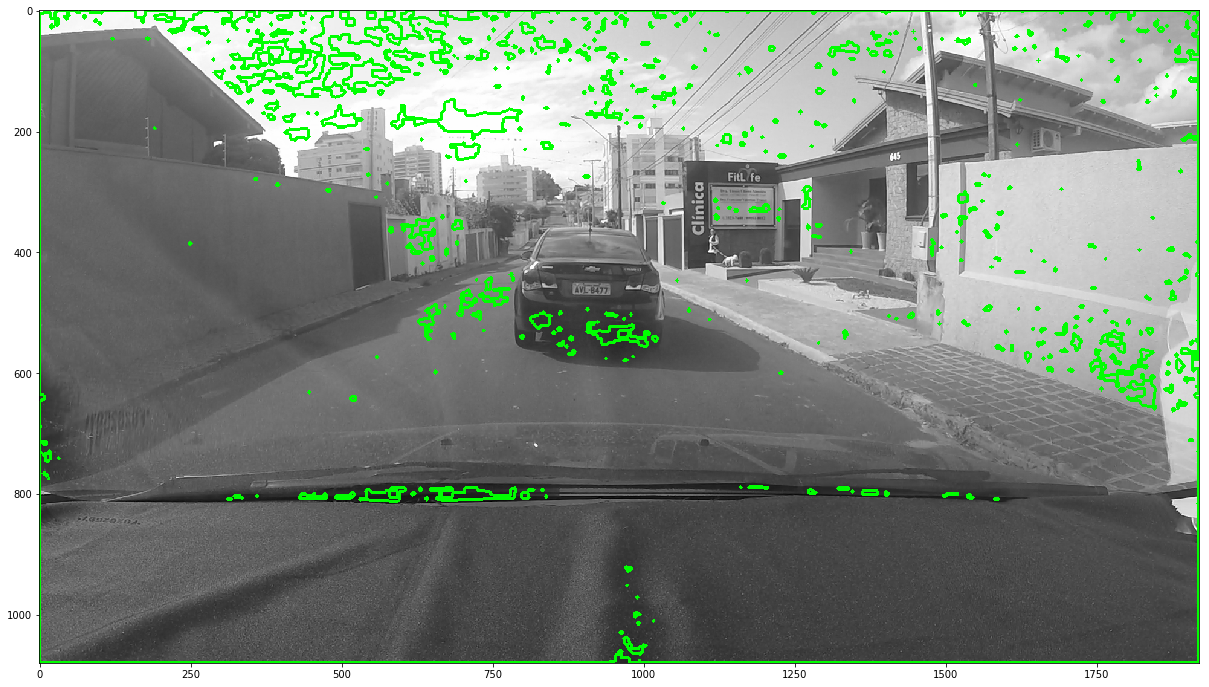

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,11))
morphDy = cv2.dilate(ythr, kernel, 1)

_, contours2, hierarch = cv2.findContours(morphDy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont2 = cv2.cvtColor(teste, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont2, contours2, -1, (0, 255, 0), 3)
plt.figure(figsize=(30,12))
plt.imshow(img_cont2, cmap="gray")

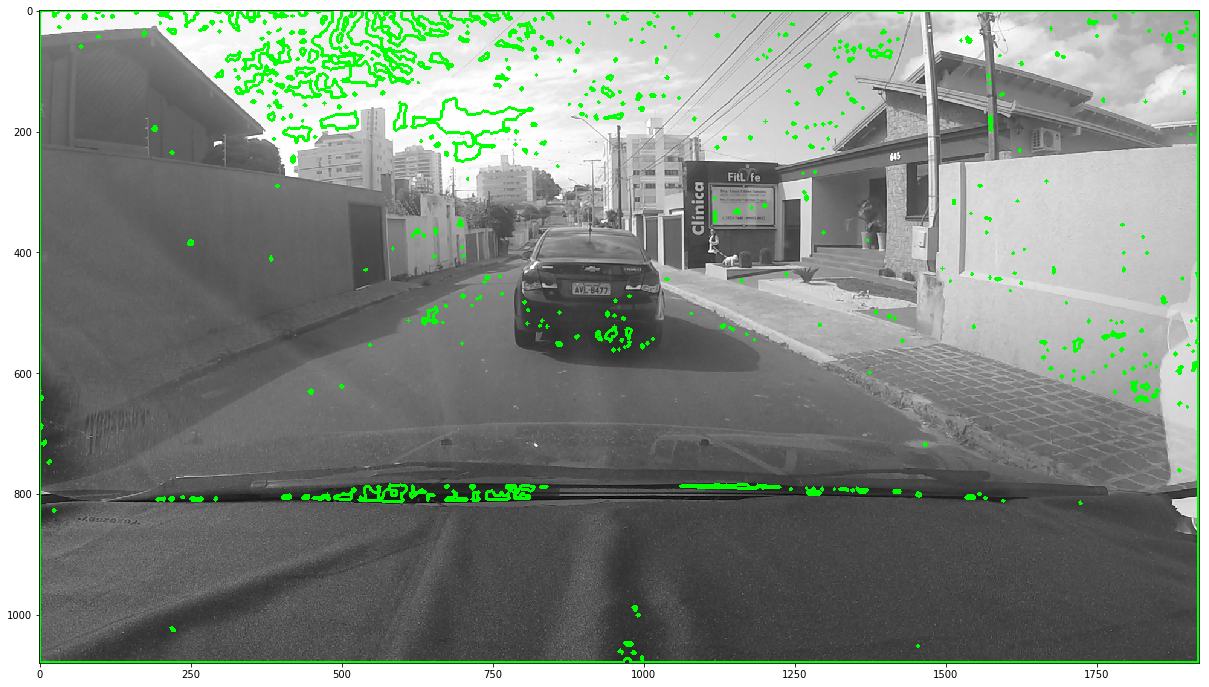

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,9))
morphDm = cv2.dilate(mthr, kernel, 1)

_, contours3, hierarch = cv2.findContours(morphDm, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont3 = cv2.cvtColor(teste, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont3, contours3, -1, (0, 255, 0), 3)
plt.figure(figsize=(30,12))
plt.imshow(img_cont3, cmap="gray")

15.0 30 74 2220


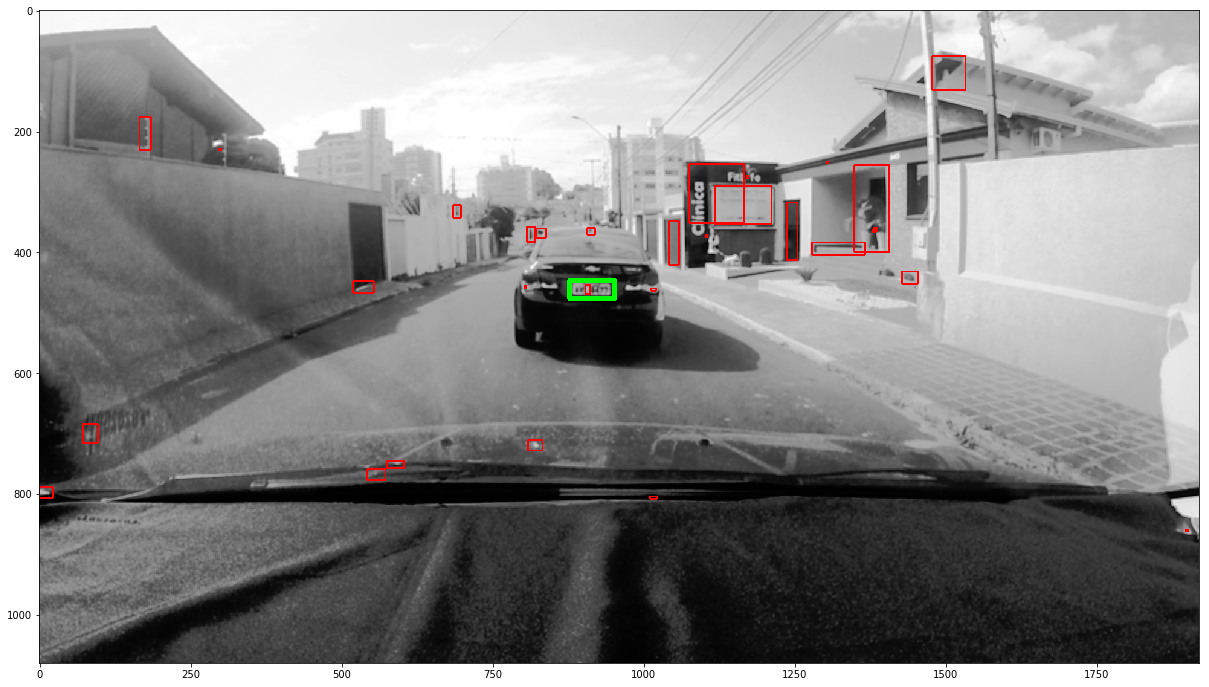

In [0]:
color = cv2.cvtColor(teste_eql, cv2.COLOR_GRAY2BGR)

for cnt in contours1:
  epsilon = 0.05 * cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt,epsilon,True)
  
  if (len(approx) == 4):
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(color, (x,y), (x+w, y+h), (255, 0, 0), 2)
    ar = 1.0 * h / 2

    if (ar >= 0.3 and ar <= 20 and h * w >= 2000 and h * w <= 23000):
      print (ar, h, w, h*w)
      cv2.rectangle(color, (x,y),(x+w, y+h), (0, 255, 0), 8)
      
plt.figure(figsize=(30,12))
plt.imshow(color, cmap="gray")

abordagem 2

In [0]:
minArea = 2700
maxArea = 20000

thrs = []
axthrs = []
fxthrs = []
coloreds = []

plt.figure(figsize=(30, 12))

for i in range(n):
  imgi = imagens_grayscale[i]
  imgi_eq = cv2.equalizeHist(imgi)
  
  kernelTh = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
  morphTh = cv2.morphologyEx(imgi_eq, cv2.MORPH_TOPHAT, kernelTh)
  _, thr = cv2.threshold(morphTh, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  thrs.append(thr)
  
  kernelAx = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 11))
  morphAx = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernelAx)
  _, axthr = cv2.threshold(morphAx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  axthrs.append(axthr)
  
  kernelFx = cv2.getStructuringElement(cv2.MORPH_RECT, (23, 1))
  morphFx = cv2.morphologyEx(morphAx, cv2.MORPH_CLOSE, kernelFx)
  _, fxthr = cv2.threshold(morphFx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  fxthrs.append(fxthr)

  _, contours4, hierarch = cv2.findContours(morphFx, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  color = cv2.cvtColor(imgi_eq, cv2.COLOR_GRAY2BGR)
  
  coloreds.append(color)
  
  for cnt in contours4:
    epsilon = 0.05 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    if (len(approx) == 4):
      x,y,w,h = cv2.boundingRect(cnt)
      ar = 1.0 * h / w
      
      if (ar >= 0.3 and ar <= 0.55 and h*w > minArea and h*w < maxArea):
        cv2.rectangle(color, (x,y), (x+w, y+h), (255, 0, 0), 2)
  plt.subplot(2, 4, i+1)
  plt.imshow(color, cmap="gray")

In [0]:
plt.figure(figsize=(30,12))
plt.imshow(coloreds[6], cmap="gray")

### Segmentação

[video](https://www.youtube.com/watch?v=STnoJ3YCWus)



In [0]:
import skimage
from skimage import filters, feature

In [0]:
testex = imagens_grayscale[1]
denoised = filters.median(testex, selem=np.ones((5,5)))
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(testex)
ax1.imshow(denoised)

In [0]:
edges = feature.canny(testex, sigma=3)
plt.figure(figsize=(30,12))
plt.imshow(edges)

In [0]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.figure(figsize=(30,12))
plt.imshow(dt)

In [0]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=1)
plt.figure(figsize=(30,12))
plt.imshow(local_max, cmap="gray")

### Criando Pipeline

In [0]:
class Image():
  def __init__(self, image, name=None, metadata=None):
    self.image = image
    self.contours = []
    self.selected_contours = []
    self.name = name
    self.metadata = metadata
    
    
  def show_image(self, image = None):
    imshow = image if not (image is None) else self.image
    plt.figure(figsize=(30,12))
    plt.imshow(imshow, cmap='gray')
    plt.tick_params(bottom=False, labelbottom=False,
                    left=False, labelleft=False)
    
  def extend_contours(self, c, sc):
    self.contours.extend(c)
    self.selected_contours(sc)
    
  def add_contour(self, c):
    self.contours.append(c)
    
  def add_sel_contour(self, sc):
    self.selected_contours.append(sc)
    
  def show_image_histogram(self, image = None):
    image = image if not (image is None) else self.image
    plt.figure(figsize=(30, 8))
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.tick_params(bottom=False, labelbottom=False,
                    left=False, labelleft=False)

    nbins = 64
    h, bin_edges = np.histogram(image.ravel(), nbins, (0, 255))
    w = 256./nbins

    bin_centers = bin_edges[1:] - (w/2)
    plt.subplot(1,2,2)
    plt.bar(bin_centers, h, width=w)
    
  def crop_region(self, x, y, w, h):
    return self.image[y:y+h, x:x+w][:]
  
  def draw_real_plate(self):
    if (self.metadata is None):
      raise Exception('This image\' metadata was not attached to the object')
      
    cpimage = np.array(self.image)
    cpimage = cv2.cvtColor(cpimage, cv2.COLOR_GRAY2BGR)
    x, y, w, h = map(int, self.metadata['position_plate'].split(" "))
    cv2.rectangle(cpimage, (x, y), (x+w, y+h), (0, 0, 255), 2)
    self.show_image(cpimage)
    
  def score(self):
    def intersection_size(x1, x2, w1, w2):
      x1_comeca = x1 <= x2
      indep = (x1 > x2 and x1 > x2+w2) or (x2 > x1 and x2 > x1+w1)
      res = 0

      if (indep): return res

      if (x1_comeca):
          if (x2 + w2 < x1 + w1):
              res = w1 - w2
          else:
              res = (x1+w1) - x2
      else:
          if (x2 + w2 > x1 > w1):
              res = w1
          else:
              res = (x2 + w2) - x1

      return abs(res)
    
    x, y, w, h = map(int, self.metadata['position_plate'].split(" "))
    true_area = w * h
    max_intersect = 0
    
    for sel in self.selected_contours:
      x1, y1, w1, h1 = sel
      if ((w1 * h1) <= 2.5 * true_area):
        intersect_x = intersection_size(x, x1, w, w1)
        intersect_y = intersection_size(y, y1, h, h1)
        i_area = intersect_x * intersect_y
        max_intersect = i_area if i_area > max_intersect else max_intersect
        
    return max_intersect
      

In [0]:
class FilterSequence():
  def __init__(self, image=None, name=None, metadata=None):
    self.trueImage = image
    self.image = Image(image, name, metadata)
    self.filter_map = {
        'equalize': cv2.equalizeHist, 'average': cv2.blur,
        'gaussian': cv2.GaussianBlur, 'median': cv2.medianBlur,
        'bilateral': cv2.bilateralFilter, 'laplacian': cv2.Laplacian,
        'prewitt': cv2.filter2D, 'canny': cv2.Canny,
        'morph': cv2.morphologyEx, 'threshold': cv2.threshold,
        'adaptive': cv2.adaptiveThreshold, 'sobel': cv2.Sobel
    }
    self.filter_sequence = []
    
  def apply_filter(self, i):
    filt, config = self.filter_sequence[i]
    func = self.filter_map[filt]
    imn = 'src' if filt != 'canny' else 'image'
    config[imn] = self.image.image
    try:
      filtered = func(**config)
    except TypeError as e:
      print(filt)
      raise Exception(e)
      
    if (filt == 'threshold'):
      filtered = filtered[1]
    
    if (filt == 'equalize'):
      self.trueImage = filtered
    
    return filtered
  
  def apply_and_draw(self, rectangle=(17,13)):
    image = self.apply_all()
    img = image.image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, rectangle)
    dilated = cv2.dilate(img, kernel, 1)

    _, contours1, _ = cv2.findContours(dilated,
                                              cv2.RETR_TREE,
                                              cv2.CHAIN_APPROX_SIMPLE)

    imgc1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(imgc1, contours1, -1, (0, 255, 0), 2)
    image.show_image(imgc1)
    
  def apply_and_draw2(self, rectangle=(17,13), show=True, ratio=(0.3, 20), area=(2000, 23000)):
    image = self.apply_all()
    img = image.image
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, rectangle)
    dilated = cv2.dilate(img, kernel, 1)
    _, contours1, _ = cv2.findContours(dilated,
                                              cv2.RETR_TREE,
                                              cv2.CHAIN_APPROX_SIMPLE)
    
    color = cv2.cvtColor(self.trueImage, cv2.COLOR_GRAY2BGR)

    for cnt in contours1:
      epsilon = 0.05 * cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt,epsilon,True)

      if (len(approx) == 4):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(color, (x,y), (x+w, y+h), (255, 0, 0), 2)
        ar = 1.0 * h / 2

        if (ar >= ratio[0] and ar <= ratio[1] and h * w >= area[0] and h * w <= area[1]):
          self.image.add_sel_contour((x, y, w, h))
          cv2.rectangle(color, (x,y),(x+w, y+h), (0, 255, 0), 2)
        else:
          self.image.add_contour((x, y, w, h))
    if (show):
      image.show_image(color)
  
  def add_filter(self, name, config):
    self.filter_sequence.append((name, config))
    
  def plot_all_filters(self, hist=False):
    image = self.image
    
    if (hist):
      image.show_image_histogram()
    else:
      image.show_image()
    
    for i in range(len(self.filter_sequence)):
      filtered = self.apply_filter(i)
      if (hist):
        image.show_image_histogram(filtered)
      else:
        image.show_image(filtered)
        
  def apply_all(self):
    image = self.image
    
    for i in range(len(self.filter_sequence)):
      filtered = self.apply_filter(i)
      image = Image(filtered)
      
    return image
      
  def apply_in_sequence(self, hist=False):
    image = self.image
    
    if (hist):
      image.show_image_histogram()
    else:
      image.show_image()
    
    for i in range(len(self.filter_sequence)):
      filterred = self.apply_filter(i)
      image = Image(filterred)
      if (hist):
        image.show_image_histogram()
      else:
        image.show_image()
    return image

### Usando Pipeline

In [0]:
ind = 9
real_seq = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]]
)
real_seq.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 8 })
real_seq.add_filter('equalize', {  })
# real_seq.add_filter('laplacian', { 'ddepth': cv2.CV_64F, 'ksize': 5 })
# real_seq.add_filter('sobel', {
#     'ddepth': cv2.CV_64F, 'ksize': 5, 'dx': 1, 'dy': 0
# })
real_seq.add_filter('canny', {
    'threshold1': 100, 'threshold2': 200, 'apertureSize': 3
})
# real_seq.add_filter('threshold', {
#     'thresh': 0, 'maxval': 255, 'type': cv2.THRESH_BINARY + cv2.THRESH_OTSU
# })
# real_seq.add_filter('adaptive', {
#     'maxValue': 255, 'adaptiveMethod': cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#     'thresholdType': cv2.THRESH_BINARY, 'blockSize': 15, 'C': 2
# })

In [0]:
real_seq.apply_and_draw2(rectangle=(13, 9))
# real_seq.apply_and_draw(rectangle=(17,5))

In [0]:
real_seq.image.draw_real_plate()

In [65]:
real_seq.image.score()

0

In [0]:
class PipelineStream():
  def __init__(self, images, names, metadata):
    self.images = []
    for i in range(len(images)):
      temp_m = metadata['training'][names[i]]
      temp = Image(images[i], name=names[i], metadata=temp_m)
      self.images.append(temp)
    self.filters = []
    
  def score_filters(self):
    # full_score = (index, score, rectangle)
    full_score = (-1, 0, ())
    
    # 16
    rectangles = [(x, y) for x in range(11, 18, 2) for y in range(5, 12, 2) if x > y]
    
    # 20
    areas = [(a_min * 100, a_max * 1000) for a_min in range(17, 24, 2) for a_max in range(17, 26, 2)]
    
    # 25
    ratios = [(r_min/100, r_max) for r_min in range(1, 151, 45) for r_max in range(7, 64, 27)]
    
    pair = [self.filters, rectangles, areas, ratios] # 16 * 20 * 25 = 8000
    
    l = len(self.filters) * len(rectangles) * len(areas) * len(ratios) * 8
    print("Executing %d combinations" % l)
    i = 0
    
    for filt, rec, ar, rat in itertools.product(*pair):
      total = 0
      for j in range(len(self.images)):
        img = self.images[j]
        filt.image = img
        filt.apply_and_draw2(rectangle=rec, show=False, area=ar, ratio=rat)
        score = filt.image.score()
        total += score
        
        i += 1
        if (i % 500 == 0): print("Current Progress: %d" % i)
        if (j > 7): break
      
      if (full_score[1] < total):
        full_score = (filt, total, rec, ar, rat)
        
    return full_score
  
  def add_filter(self, filt):
    self.filters.append(filt)
    
  def extend_filters(self, filters):
    self.filters.extend(filters)

In [0]:
f1 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f1.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
f1.add_filter('equalize', {  })
f1.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f1.apply_and_draw2()

In [0]:
f2 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f2.add_filter('gaussian', { 'ksize': (5,5), 'sigmaX': 0 })
f2.add_filter('equalize', {  })
f2.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f2.apply_and_draw2()

In [0]:
f3 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f3.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 5 })
f3.add_filter('equalize', {  })
f3.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f3.apply_and_draw2()

In [0]:
f4 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f4.add_filter('gaussian', { 'ksize': (5,5), 'sigmaX': 5 })
f4.add_filter('equalize', {  })
f4.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f4.apply_and_draw2()

In [0]:
f5 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f5.add_filter('average', { 'ksize': (3,3) })
f5.add_filter('equalize', {  })
f5.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f5.apply_and_draw2()

In [0]:
f6 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f6.add_filter('average', { 'ksize': (5,5) })
f6.add_filter('equalize', {  })
f6.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f6.apply_and_draw2()

In [0]:
f7 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f7.add_filter('average', { 'ksize': (7,7) })
f7.add_filter('equalize', {  })
f7.add_filter('canny', { 'threshold1': 100, 'threshold2': 200, 'apertureSize': 3 })
f7.apply_and_draw2()

In [0]:
f8 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f8.add_filter('average', { 'ksize': (7,7) })
f8.add_filter('equalize', {  })
k1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
f8.add_filter('morph', { 'op': cv2.MORPH_GRADIENT, 'kernel': k1 })
f8.apply_and_draw2()

In [0]:
f9 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f9.add_filter('average', { 'ksize': (3,3) })
f9.add_filter('equalize', {  })
k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
f9.add_filter('morph', { 'op': cv2.MORPH_GRADIENT, 'kernel': k2 })
f9.apply_and_draw2()

In [0]:
fA = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fA.add_filter('average', { 'ksize': (5,5) })
fA.add_filter('equalize', {  })
k3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
fA.add_filter('morph', { 'op': cv2.MORPH_GRADIENT, 'kernel': k3 })
fA.apply_and_draw2()

In [0]:
fB = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fB.add_filter('average', { 'ksize': (7,7) })
fB.add_filter('equalize', {  })
k4 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
fB.add_filter('morph', { 'op': cv2.MORPH_GRADIENT, 'kernel': k4 })
fB.apply_and_draw2()

In [0]:
fC = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fC.add_filter('gaussian', { 'ksize': (5,5), 'sigmaX': 5 })
fC.add_filter('equalize', {  })
k5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
fC.add_filter('morph', { 'op': cv2.MORPH_GRADIENT, 'kernel': k5 })
fC.apply_and_draw2()

In [0]:
fD = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fD.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
fD.add_filter('equalize', {  })
fD.add_filter('canny', { 'threshold1': 100, 'threshold2': 300, 'apertureSize': 3 })
fD.apply_and_draw2()

In [0]:
fE = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fE.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
fE.add_filter('equalize', {  })
fE.add_filter('canny', { 'threshold1': 200, 'threshold2': 300, 'apertureSize': 3 })
fE.apply_and_draw2()

In [0]:
fE = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fE.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
fE.add_filter('equalize', {  })
fE.add_filter('canny', { 'threshold1': 100, 'threshold2': 300, 'apertureSize': 5 })
fE.apply_and_draw2()

In [0]:
fF = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
fF.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
fF.add_filter('equalize', {  })
fF.add_filter('canny', { 'threshold1': 50, 'threshold2': 200, 'apertureSize': 3 })
fF.apply_and_draw2()

In [0]:
f10 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f10.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
f10.add_filter('equalize', {  })
f10.add_filter('canny', { 'threshold1': 50, 'threshold2': 300, 'apertureSize': 5 })
f10.apply_and_draw2()

In [0]:
f11 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f11.add_filter('gaussian', { 'ksize': (5,5), 'sigmaX': 0 })
f11.add_filter('equalize', {  })
f11.add_filter('canny', { 'threshold1': 100, 'threshold2': 300, 'apertureSize': 3 })
f11.apply_and_draw2()

In [0]:
f12 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f12.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
f12.add_filter('equalize', {  })
f12.add_filter('canny', { 'threshold1': 150, 'threshold2': 250, 'apertureSize': 3 })
f12.apply_and_draw2()

In [0]:
f13 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f13.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
f13.add_filter('equalize', {  })
f13.add_filter('sobel', { 'ddepth': cv2.CV_64F, 'dx': 1, 'dy': 0, 'ksize': 3 })
f13.add_filter('threshold', {
    'thresh': 0, 'maxval': 255, 'type': cv2.THRESH_BINARY + cv2.THRESH_OTSU
})
f13.apply_and_draw2()

In [0]:
f14 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f14.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
f14.add_filter('equalize', {  })
f14.add_filter('sobel', { 'ddepth': cv2.CV_64F, 'dx': 1, 'dy': 0, 'ksize': 3 })
f14.add_filter('adaptive', {
    'maxValue': 255, 'adaptiveMethod': cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    'thresholdType': cv2.THRESH_BINARY, 'blockSize': 15, 'C': 2
})
f14.apply_and_draw2()

In [0]:
f15 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f15.add_filter('gaussian', { 'ksize': (5,5), 'sigmaX': 0 })
f15.add_filter('equalize', {  })
f15.add_filter('sobel', { 'ddepth': cv2.CV_64F, 'dx': 1, 'dy': 0, 'ksize': 3 })
f15.add_filter('threshold', {
    'thresh': 0, 'maxval': 255, 'type': cv2.THRESH_BINARY + cv2.THRESH_OTSU
})
f15.apply_and_draw2()

In [0]:
f16 = FilterSequence(
    imagens_grayscale[ind],
    name=ext_imagens[ind],
    metadata=metadata['training'][ext_imagens[ind]])
f16.add_filter('gaussian', { 'ksize': (3,3), 'sigmaX': 0 })
f16.add_filter('equalize', {  })
f16.add_filter('sobel', { 'ddepth': cv2.CV_64F, 'dx': 1, 'dy': 0, 'ksize': 3 })
f16.add_filter('adaptive', {
    'maxValue': 255, 'adaptiveMethod': cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    'thresholdType': cv2.THRESH_BINARY, 'blockSize': 15, 'C': 2
})
f16.apply_and_draw2()

In [0]:
pipe = PipelineStream(imagens_grayscale, ext_imagens, metadata)

In [0]:
pipe.extend_filters([f1, f2, f3, f4, f5, f6, f7, f8, f9, fA, fB, fC, fD, fE, fF, f10, f11, f12, f13, f14, f15, f16])

In [0]:
# simplified
pipe.extend_filters([f1])

In [143]:
hold = pipe.score_filters()

Executing 28800 combinations
Current Progress: 500
Current Progress: 1000
Current Progress: 1500
Current Progress: 2000
Current Progress: 2500
Current Progress: 3000
Current Progress: 3500
Current Progress: 4000
Current Progress: 4500
Current Progress: 5000
Current Progress: 5500
Current Progress: 6000
Current Progress: 6500
Current Progress: 7000
Current Progress: 7500
Current Progress: 8000
Current Progress: 8500
Current Progress: 9000
Current Progress: 9500
Current Progress: 10000
Current Progress: 10500
Current Progress: 11000
Current Progress: 11500
Current Progress: 12000
Current Progress: 12500
Current Progress: 13000
Current Progress: 13500
Current Progress: 14000
Current Progress: 14500
Current Progress: 15000
Current Progress: 15500
Current Progress: 16000
Current Progress: 16500
Current Progress: 17000
Current Progress: 17500
Current Progress: 18000
Current Progress: 18500
Current Progress: 19000
Current Progress: 19500
Current Progress: 20000
Current Progress: 20500
Current

In [144]:
hold[1:]

(6385, (11, 5), (1700, 17000), (0.01, 34))

In [0]:
pipe2 = PipelineStream(imagens_grayscale, ext_imagens, metadata)
pipe2.extend_filters([f1, f3, f5, f7, f9, fB, fD, fF, f11, f13, f15])
hold2 = pipe2.score_filters()

Executing 633600 combinations
Current Progress: 500
Current Progress: 1000
Current Progress: 1500
Current Progress: 2000
Current Progress: 2500
Current Progress: 3000
Current Progress: 3500
Current Progress: 4000
Current Progress: 4500
Current Progress: 5000
Current Progress: 5500
Current Progress: 6000
Current Progress: 6500
Current Progress: 7000
Current Progress: 7500
Current Progress: 8000
Current Progress: 8500
Current Progress: 9000
Current Progress: 9500
Current Progress: 10000
Current Progress: 10500
Current Progress: 11000
Current Progress: 11500
Current Progress: 12000
Current Progress: 12500
Current Progress: 13000
Current Progress: 13500
Current Progress: 14000
Current Progress: 14500
Current Progress: 15000
Current Progress: 15500
Current Progress: 16000
Current Progress: 16500
Current Progress: 17000
Current Progress: 17500
Current Progress: 18000
Current Progress: 18500
Current Progress: 19000
Current Progress: 19500
Current Progress: 20000
Current Progress: 20500
Curren

In [1]:
hold2[1:]

NameError: ignored

In [0]:

hold[0].filter_sequence

In [0]:
hold[1]

In [0]:
best_filter = hold[0]

In [0]:
indice = 11
img_name = ext_imagens[indice]
best_filter.image = Image(imagens_grayscale[indice], name=img_name, metadata=metadata['training'][img_name])
best_filter.apply_and_draw2()